## Loan Predictions using DecisionTree and Random Forest Classifier

In [23]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#READ FILE AND SAVE AS loans
loans = pd.read_csv('train.csv')

Expoloratory data analysis

In [25]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [27]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


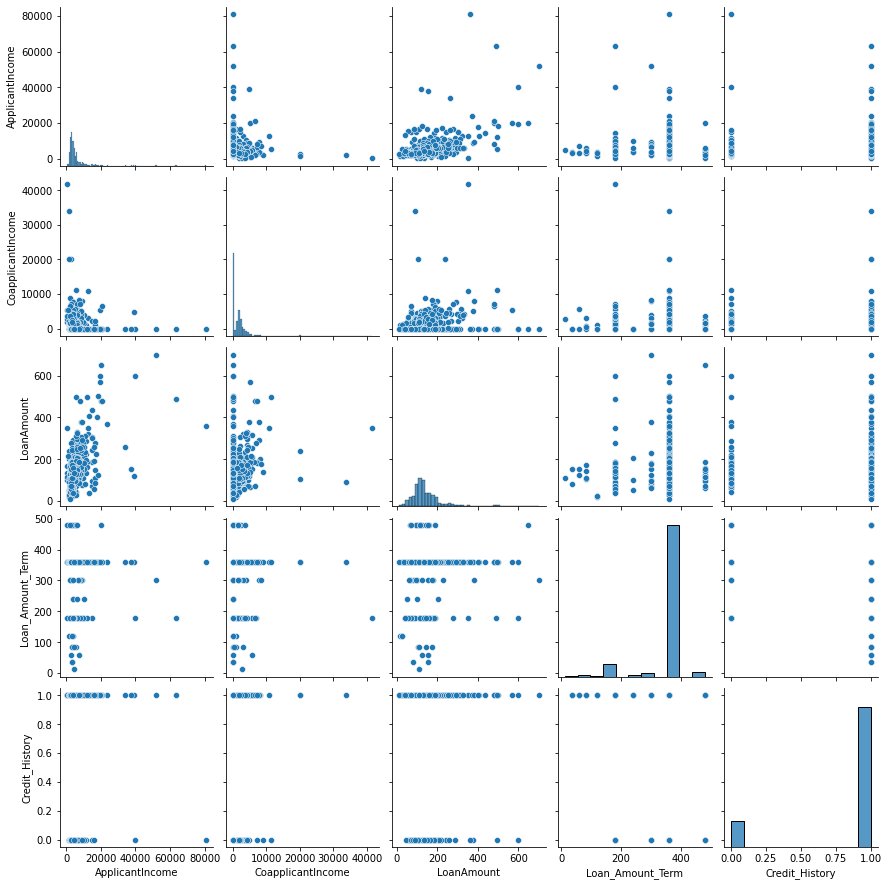

In [28]:
sns.pairplot(loans)

C:\Users\Vishal\anaconda3\envs\Firstenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


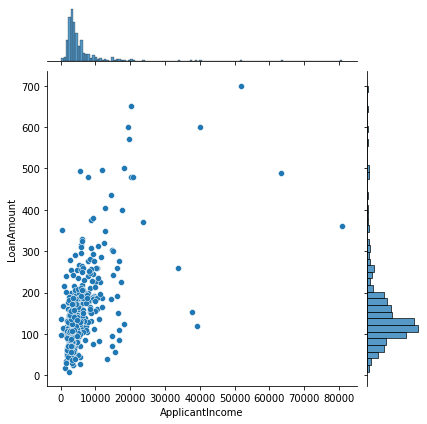

In [29]:
sns.jointplot('ApplicantIncome', 'LoanAmount', data = loans)

C:\Users\Vishal\anaconda3\envs\Firstenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

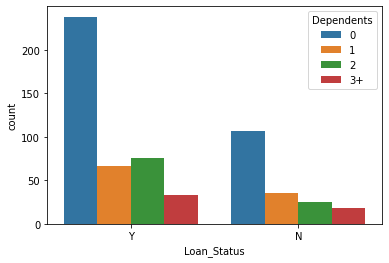

In [30]:
sns.countplot('Loan_Status', hue = 'Dependents', data = loans)

C:\Users\Vishal\anaconda3\envs\Firstenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

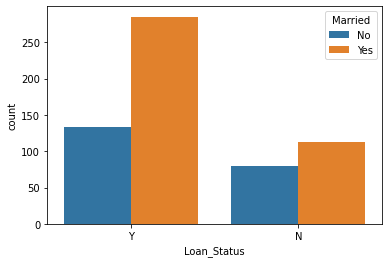

In [31]:
sns.countplot('Loan_Status', hue = 'Married', data = loans)

C:\Users\Vishal\anaconda3\envs\Firstenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

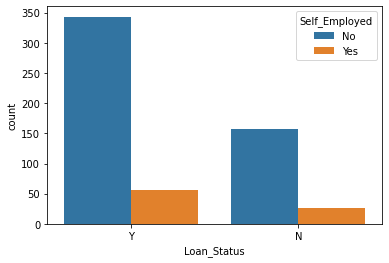

In [32]:
sns.countplot('Loan_Status', hue = 'Self_Employed', data = loans)

In [33]:
loans[loans['Loan_Status']=='Y'].count()['Loan_Status']

422

In [34]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Create dummies of categorical data 

In [35]:
Final_gender= pd.get_dummies(loans, columns=['Gender'], drop_first=True)

In [36]:
Final_edu = pd.get_dummies(Final_gender, columns=['Education'], drop_first=True)

In [37]:
Final_SE= pd.get_dummies(Final_edu, columns=['Self_Employed'], drop_first=True)

In [38]:
Final_PA = pd.get_dummies(Final_SE, columns=['Property_Area'], drop_first=True)

In [39]:
Final_married = pd.get_dummies(Final_PA, columns=['Married'], drop_first=True)

In [40]:
#Loan_ID = loans['Loan_ID']

In [41]:
Final_data = Final_married.drop(['Loan_ID'], axis = 1)
#Final_data = Final_married

In [42]:
Final_data.drop(['Education_Not Graduate'], axis = 1, inplace=True)

In [43]:
Final_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0


In [44]:
Final_data1 = pd.get_dummies(Final_data, columns=['Loan_Status'], drop_first=True)

In [47]:
Final_data1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,1,1


Drop all the NULL values

In [48]:
Final_data1.dropna(inplace=True)

In [49]:
Final_data1.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Married_Yes                0
Loan_Status_Y              0
dtype: int64

In [50]:
Final_data1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Married_Yes,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,1,1


In [56]:
Final_data1['Dependents'].replace(to_replace='3+', value=3, inplace=True)
Final_data1['Dependents'].replace(to_replace='2', value=2, inplace=True)
Final_data1['Dependents'].replace(to_replace='1', value=1, inplace=True)
Final_data1['Dependents'].replace(to_replace='0', value=0, inplace=True)

In [54]:
Final_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               517 non-null    int64  
 1   ApplicantIncome          517 non-null    int64  
 2   CoapplicantIncome        517 non-null    float64
 3   LoanAmount               517 non-null    float64
 4   Loan_Amount_Term         517 non-null    float64
 5   Credit_History           517 non-null    float64
 6   Gender_Male              517 non-null    uint8  
 7   Self_Employed_Yes        517 non-null    uint8  
 8   Property_Area_Semiurban  517 non-null    uint8  
 9   Property_Area_Urban      517 non-null    uint8  
 10  Married_Yes              517 non-null    uint8  
 11  Loan_Status_Y            517 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 31.3 KB


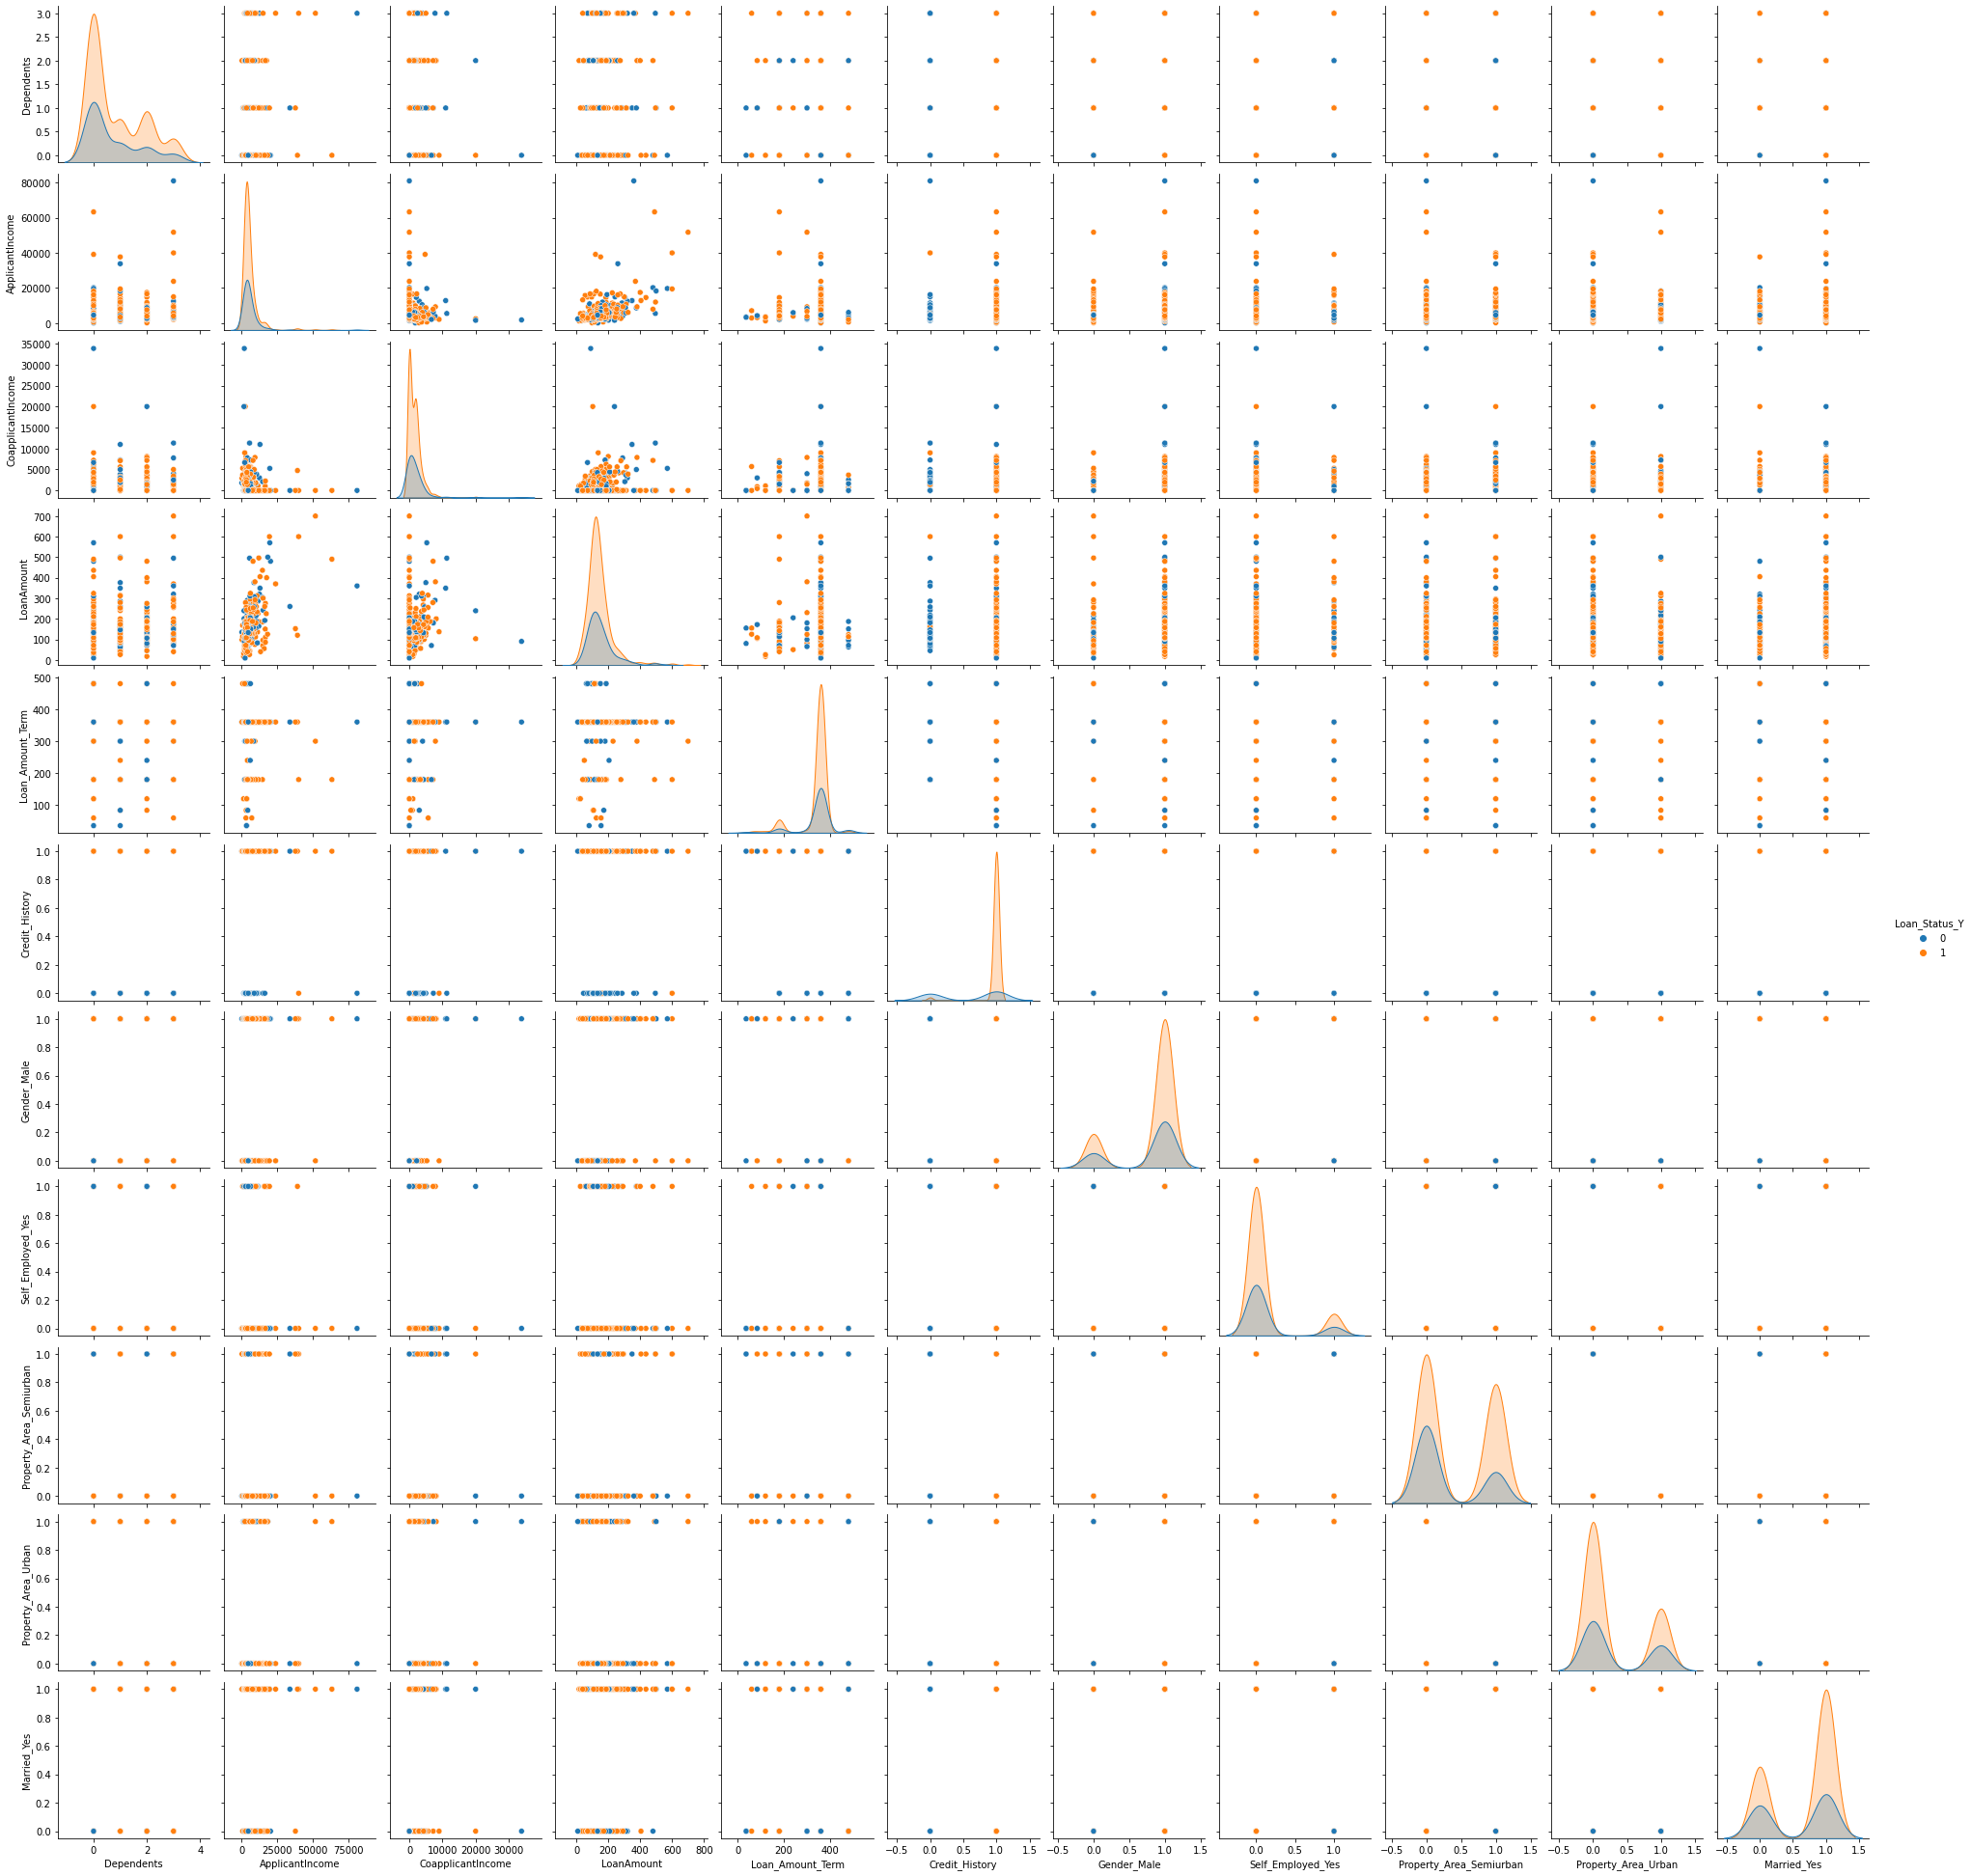

In [55]:
sns.pairplot(Final_data1, hue='Loan_Status_Y')

In [57]:
#Create train test data
from sklearn.model_selection import train_test_split

In [58]:
x = Final_data1.drop('Loan_Status_Y', axis = 1)
y = Final_data1['Loan_Status_Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [59]:
x.head(),y.head()

(   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
 1           1             4583             1508.0       128.0   
 2           0             3000                0.0        66.0   
 3           0             2583             2358.0       120.0   
 4           0             6000                0.0       141.0   
 5           2             5417             4196.0       267.0   
 
    Loan_Amount_Term  Credit_History  Gender_Male  Self_Employed_Yes  \
 1             360.0             1.0            1                  0   
 2             360.0             1.0            1                  1   
 3             360.0             1.0            1                  0   
 4             360.0             1.0            1                  0   
 5             360.0             1.0            1                  1   
 
    Property_Area_Semiurban  Property_Area_Urban  Married_Yes  
 1                        0                    0            1  
 2                        0             

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier()

In [62]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
predictions = dtree.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53        48
           1       0.81      0.63      0.71       108

    accuracy                           0.64       156
   macro avg       0.63      0.65      0.62       156
weighted avg       0.70      0.64      0.65       156



In [66]:
print(confusion_matrix(y_test, predictions))

[[32 16]
 [40 68]]


In [48]:
### Now lets use Random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rnf = RandomForestClassifier()

In [69]:
rnf.fit(x_train, y_train)

RandomForestClassifier()

In [70]:
pred = rnf.predict(x_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        48
           1       0.80      0.92      0.86       108

    accuracy                           0.79       156
   macro avg       0.77      0.71      0.72       156
weighted avg       0.78      0.79      0.78       156



In [55]:
##randomforest classifier did pretty good job